# I. Import library and dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stats
import scipy.stats as st

In [4]:
anime = pd.read_csv("../../data/csv/input/AnimeList.csv")

# II. Basic Dataset Information and First Impressions

Firstly, we will explore some basic information in the given dataset.

In [5]:
anime.shape

(14478, 31)

In [6]:
anime.drop_duplicates(inplace=True)

There are 14478 rows and 31 columns in this dataset.

In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

We look at the first 5 rows of the dataset to get some sense of how the data is constructed.

In [8]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [9]:
print(anime.iloc[0])

anime_id                                                      11013
title                                                 Inu x Boku SS
title_english                             Inu X Boku Secret Service
title_japanese                                               妖狐×僕SS
title_synonyms                                      Youko x Boku SS
image_url         https://myanimelist.cdn-dena.com/images/anime/...
type                                                             TV
source                                                        Manga
episodes                                                         12
status                                              Finished Airing
airing                                                        False
aired_string                           Jan 13, 2012 to Mar 30, 2012
aired                    {'from': '2012-01-13', 'to': '2012-03-30'}
duration                                            24 min. per ep.
rating                                    PG-13 

We will clean the data by columns. First of all, we will list all the available columns.

In [10]:
anime.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [11]:
anime.dtypes

anime_id            int64
title              object
title_english      object
title_japanese     object
title_synonyms     object
image_url          object
type               object
source             object
episodes            int64
status             object
airing               bool
aired_string       object
aired              object
duration           object
rating             object
score             float64
scored_by           int64
rank              float64
popularity          int64
members             int64
favorites           int64
background         object
premiered          object
broadcast          object
related            object
producer           object
licensor           object
studio             object
genre              object
opening_theme      object
ending_theme       object
dtype: object

And the type of the columns.

In [12]:
numerical_cols = [col for col in anime.columns if pd.api.types.is_numeric_dtype(anime[col])]
categorical_cols = list(set(anime.columns) - set(numerical_cols))
print(f"Numerical cols: {numerical_cols}")
print(f"Categorical cols: {categorical_cols}")

Numerical cols: ['anime_id', 'episodes', 'airing', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']
Categorical cols: ['image_url', 'rating', 'broadcast', 'opening_theme', 'producer', 'aired_string', 'title', 'ending_theme', 'type', 'title_japanese', 'status', 'duration', 'source', 'genre', 'title_english', 'premiered', 'licensor', 'related', 'aired', 'background', 'title_synonyms', 'studio']


Moreover, there are some notable columns with specific types:
- `related`: maybe `dict` type.
- `opening_theme` and `ending_theme`: `list` type.

In [13]:
anime.related.head()

0    {'Adaptation': [{'mal_id': 17207, 'type': 'man...
1    {'Adaptation': [{'mal_id': 759, 'type': 'manga...
2    {'Adaptation': [{'mal_id': 101, 'type': 'manga...
3    {'Adaptation': [{'mal_id': 1581, 'type': 'mang...
4    {'Adaptation': [{'mal_id': 9711, 'type': 'mang...
Name: related, dtype: object

In [14]:
anime.related[0]

"{'Adaptation': [{'mal_id': 17207, 'type': 'manga', 'url': 'https://myanimelist.net/manga/17207/Inu_x_Boku_SS', 'title': 'Inu x Boku SS'}], 'Sequel': [{'mal_id': 13403, 'type': 'anime', 'url': 'https://myanimelist.net/anime/13403/Inu_x_Boku_SS_Special', 'title': 'Inu x Boku SS Special'}]}"

In [15]:
anime[["opening_theme", "ending_theme"]].head()

,opening_theme,ending_theme
0,"['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,"['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,"['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,"['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,"['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [16]:
anime.ending_theme[0]

'[\'#1: "Nirvana" by MUCC (eps 1, 11-12)\', \'#2: "Rakuen no Photograph (楽園のPhotograph)" by Soushi Miketsukami (Yuichi Nakamura) (eps 2, 9)\', \'#3: "Kimi wa (君は)" by Ririchiyo Shirakiin (Rina Hidaka) (eps 3, 8)\', \'#4: "one way" by Banri Watanuki (Takuya Eguchi) & Zange Natsume (Mamoru Miyano) (ep 4)\', \'#5: "SM Hantei Forum (SM判定フォーラム)" by Kagerou Shoukiin (Tomokazu Sugita) (ep 5, 10)\', \'#6: "sweets parade" by Karuta Roromiya (Kana Hanazawa) (ep 6)\', \'#7: "Taiyou to Tsuki (太陽と月)" by Renshou Sorinozuka (Yoshimasa Hosoya) & Nobara Yukinokouji (Youko Hikasa) (ep 7)\']'

But they are string representation of `list` and `dict` type. We must change these values to their corresponding types to extract meaningful information.

In [17]:
for col in ["related", "opening_theme", "ending_theme"]:
    anime[col] = anime[col].apply(eval)

We also check for missing values per column.

In [18]:
num_rows = anime.shape[0]
for col in anime.columns:
    num_missing = anime[col].isnull().sum()
    if num_missing > 0:
        print(f"Column {col}: Missing {num_missing} values, about {num_missing/num_rows*100:.2f}%.")

Column title_english: Missing 8754 values, about 60.46%.
Column title_japanese: Missing 35 values, about 0.24%.
Column title_synonyms: Missing 5541 values, about 38.27%.
Column image_url: Missing 96 values, about 0.66%.
Column rank: Missing 1574 values, about 10.87%.
Column background: Missing 13421 values, about 92.70%.
Column premiered: Missing 10382 values, about 71.71%.
Column broadcast: Missing 10207 values, about 70.50%.
Column producer: Missing 6190 values, about 42.75%.
Column licensor: Missing 11105 values, about 76.70%.
Column studio: Missing 5934 values, about 40.99%.
Column genre: Missing 64 values, about 0.44%.


Some statistics of the numerical columns are also essential.

In [19]:
np.round(anime.drop(columns=["anime_id"]).describe(),2)

,episodes,score,scored_by,rank,popularity,members,favorites
count,14478.00,14478.00,14478.00,12904.00,14478.00,14478.00,14478.00
mean,11.31,6.14,11460.03,6439.07,7220.26,22966.40,311.65
std,43.44,1.46,43105.19,3720.23,4170.08,74981.36,2615.55
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.55,46.00,3216.25,3611.50,245.00,0.00
50%,1.00,6.37,501.00,6441.50,7225.50,1679.50,2.00
75%,12.00,7.06,3941.50,9664.00,10827.75,10379.00,23.00
max,1818.00,10.00,1009477.00,12919.00,14487.00,1456378.00,106895.00


### Some notes:
- There are some suspicious columns, including `aired`, `aired_string`, and `airing`. These columns maybe redundant and not up-to-date.
- `background` contains mostly null values, which means almost animes have no background information. This is maybe due to data crawling error. As a result, we may consider dropping it.
- There are some animes with 0 episodes. The anime should be unaired yet. But we should check if there is any error.

# III. Data Cleaning

In [20]:
## Reprint all the columns for references
anime.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

### 1. Anime ID

In [21]:
anime.anime_id.dtype

dtype('int64')

In [22]:
anime.anime_id.isnull().sum()

0

In [23]:
anime.anime_id.nunique() == len(anime)

True

It does seem that this column is fine. As there is no null value (each `anime_id` represents an anime). Therefore, we can use this column as an index column or a primary key in our database.

### 2. Anime titles (`title`, `title_english`, `title_japanese`,`title_synonyms`)

In [24]:
anime[['title', 'title_english', 'title_japanese', 'title_synonyms']].head()

,title,title_english,title_japanese,title_synonyms
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year"
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3


In [25]:
anime[anime['title_english'].isnull() & anime['title_japanese'].isnull() & anime['title_synonyms'].isnull()].head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
797,33449,Moving Colors,NaN,NaN,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,...,NaN,NaN,NaN,[],Decovocal,NaN,NaN,Dementia,[],[]
1021,34060,Dead World,NaN,NaN,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Horror,[],[]
1597,34151,Landreaall,NaN,NaN,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,0,Finished Airing,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 8751, 'type': 'mang...",NaN,NaN,Will Palette,"Action, Adventure, Romance, Martial Arts, Fantasy",[],[]


There are such animes that all `title_english`, `title_japanese`, `title_synonyms` are `NaN`. 

In [26]:
anime[anime['title_english'].isnull() & anime['title_japanese'].isnull() & anime['title_synonyms'].isnull()].head().isnull().sum(axis=1)

797     8
1021    9
1597    8
3411    9
4251    8
dtype: int64

As the basic information, roughly 60% of the English title and 38% of the synonyms title is missing. But no title is empty and thus, we can easily define an anime given a `title`. Therefore, `title_english`, `title_japanese`, `title_synonyms` are optional and we can safely keep them.

In [27]:
anime[anime["title"].str.contains("&#039;")].head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
114,1778,Dae Jang Geum: Jang Geum&#039;s Dream,NaN,少女チャングムの夢,"Shoujo Changumu no Yume, Janggeum&#039;s Dream...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,26,Finished Airing,...,NaN,Fall 2005,Unknown,"{'Sequel': [{'mal_id': 9200, 'type': 'anime', ...",Heewon Entertainment,NaN,NaN,"Adventure, Comedy, Historical","[""Ima ga Daisuki"" by Younha]","[""Moonlight Girl (달빛 소녀)"" by Lee Seung Hwan (이..."
162,23855,Dennou Sentai Voogie&#039;s★Angel Gaiden: Susu...,NaN,電脳戦隊ヴギィ&#039;ズ★エンジェル外伝 進め! スーパー★エンジェルス!,"Voogie&#039;s Angel OVA, Susume! Super Angels!",https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,2,Finished Airing,...,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 2453, 'type': 'an...",NaN,NaN,J.C.Staff,"Action, Comedy, Mecha, Parody, Sci-Fi",[],[]
213,1640,Angel&#039;s Feather,Angel&#039;s Feather,エンジェルズフェザー Angel&#039;s Feather,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,2,Finished Airing,...,NaN,NaN,NaN,[],NaN,Media Blasters,Venet,"Sci-Fi, Supernatural, Drama, Romance, Fantasy,...","[""ROCK STAR"" by Kakihara Tetsuya & Hatano Wataru]","[""LAST SONG"" by Ishikawa Hideo & Suzuki Chihiro]"


In [28]:
def replace_catastrophe(string):
    if isinstance(string, str):
        return string.replace("&#039;", "'")
    return string

In [29]:
anime_fixed = anime.copy()

In [30]:
for col in list(set(categorical_cols) - {"related", "opening_theme", "ending_theme"}):
    anime_fixed[col] = anime_fixed[col].apply(replace_catastrophe)

In [31]:
anime_fixed[anime_fixed.anime_id == 1778]

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
114,1778,Dae Jang Geum: Jang Geum's Dream,NaN,少女チャングムの夢,"Shoujo Changumu no Yume, Janggeum's Dream, Cha...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,26,Finished Airing,...,NaN,Fall 2005,Unknown,"{'Sequel': [{'mal_id': 9200, 'type': 'anime', ...",Heewon Entertainment,NaN,NaN,"Adventure, Comedy, Historical","[""Ima ga Daisuki"" by Younha]","[""Moonlight Girl (달빛 소녀)"" by Lee Seung Hwan (이..."


### 3. Image Url (`image_url`)

First of all, we get the first 5 image_url link and then try to access them.

In [32]:
anime_fixed.image_url.head()

0    https://myanimelist.cdn-dena.com/images/anime/...
1    https://myanimelist.cdn-dena.com/images/anime/...
2    https://myanimelist.cdn-dena.com/images/anime/...
3    https://myanimelist.cdn-dena.com/images/anime/...
4    https://myanimelist.cdn-dena.com/images/anime/...
Name: image_url, dtype: object

The column's dtype is object and is `str` in python. Therefore, we will replace `NaN` (96 values) by `""`. 

In [33]:
anime_filled = anime_fixed.copy()

In [34]:
anime_filled["image_url"].fillna("", inplace=True)

In [35]:
for i in range(5):
    print(anime_filled.loc[i,'image_url'])

https://myanimelist.cdn-dena.com/images/anime/12/35893.jpg
https://myanimelist.cdn-dena.com/images/anime/13/58383.jpg
https://myanimelist.cdn-dena.com/images/anime/11/10645.jpg
https://myanimelist.cdn-dena.com/images/anime/13/32209.jpg
https://myanimelist.cdn-dena.com/images/anime/6/41845.jpg


We then welcome with an error indicated that there is no such domain.
<img src="./images/image_url.png">

By visiting myanimelist and getting the image links, we find that the right domain name must be `cdn.myanimelist.net` instead of `myanimelist.cdn-dena.com`.

And this is the first link after changing: `https://cdn.myanimelist.net/images/anime/12/35893.jpg`

<img src="https://cdn.myanimelist.net/images/anime/12/35893.jpg">

Which is the true image for the first anime:

In [36]:
anime_filled.head(1)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","[""Nirvana"" by MUCC]","[#1: ""Nirvana"" by MUCC (eps 1, 11-12), #2: ""Ra..."


We then write some code to change the domain for `image_url`.

In [37]:
def fix_image_url(image_url):
    if isinstance(image_url, str):
        return image_url.replace("myanimelist.cdn-dena.com", "cdn.myanimelist.net")
    return np.NaN

In [38]:
anime_url_fixed = anime_filled.copy()
anime_url_fixed["image_url"] = anime_url_fixed["image_url"].apply(fix_image_url)

In [39]:
anime_url_fixed.image_url.head()

0    https://cdn.myanimelist.net/images/anime/12/35...
1    https://cdn.myanimelist.net/images/anime/13/58...
2    https://cdn.myanimelist.net/images/anime/11/10...
3    https://cdn.myanimelist.net/images/anime/13/32...
4    https://cdn.myanimelist.net/images/anime/6/418...
Name: image_url, dtype: object

It seems fine now and we can access the images.

In [40]:
# import image module
from IPython.display import Image
# get url
url = anime_url_fixed.image_url[0]
# get the image
Image(url=url)

### 4. Type, Source (`type`, `source`)

In [41]:
# We have already known that these columns are non-null
# Get the possible values

anime_url_fixed.source.value_counts()

Unknown          4210
Original         3368
Manga            3120
Visual novel      888
Game              607
Light novel       563
Other             408
Novel             359
Music             314
4-koma manga      224
Web manga         150
Picture book       96
Book               93
Card game          59
Digital manga      10
Radio               9
Name: source, dtype: int64

In [42]:
anime_url_fixed.type.value_counts()

TV         4271
OVA        3612
Movie      2624
Special    1948
ONA        1144
Music       849
Unknown      30
Name: type, dtype: int64

We realize that the null values are categorized as `Unknown` here. Let's change that to `NaN` and pick some of them.

In [43]:
anime_replaced = anime_url_fixed.copy()

In [44]:
anime_replaced[["type", "source"]] = anime_url_fixed[["type", "source"]].replace({"Unknown":np.NaN})

In [45]:
anime_replaced[(anime_replaced.source.isnull()) & (anime_replaced.type.isnull())].head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
4681,24023,Project758,NaN,PROJECT758,NaN,https://cdn.myanimelist.net/images/anime/7/622...,NaN,NaN,0,Not yet aired,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Drama,[],[]
5029,32455,Gekidol,NaN,ゲキドル,NaN,https://cdn.myanimelist.net/images/anime/6/778...,NaN,NaN,0,Not yet aired,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Music,[],[]
14296,37117,Bakutsuri Bar Hunter,NaN,爆釣バーハンター,NaN,https://cdn.myanimelist.net/images/anime/8/900...,NaN,NaN,0,Not yet aired,...,NaN,NaN,NaN,[],NaN,NaN,Toei Animation,"Adventure, Kids",[],[]


There are 3 animes with both `Unknown` type and source. These animes weren't aired yet when the dataset was created. Notably, almost all the columns are null. 

In [46]:
anime_replaced[anime_replaced.source.isnull()].head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
54,11547,Sengoku☆Paradise Kiwami,NaN,戦国☆パラダイス-極-（きわみ）,NaN,https://cdn.myanimelist.net/images/anime/11/39...,TV,NaN,26,Finished Airing,...,NaN,Fall 2011,Unknown,[],"TV Tokyo, G-mode",NaN,"Milky Cartoon, LMD","Action, Comedy, Drama, Historical, Romance, Sa...","[#01: ""Return Ranse Dokugan Ryuu (リターン乱世独眼竜)"" ...","[""Return Ranse Dokugan Ryuu (リターン乱世独眼竜)"" by Te..."
58,7605,Parasol Henbei,NaN,パラソルヘンべえ,"Henbe, Parasol Henbee",https://cdn.myanimelist.net/images/anime/6/447...,TV,NaN,200,Finished Airing,...,NaN,Fall 1989,Unknown,[],NaN,NaN,NaN,"Adventure, Comedy, Fantasy, Kids, Magic",[],[]
59,9389,Ginga Hyouryuu Vifam: Kieta 12-nin,NaN,銀河漂流バイファム 消えた12人,"Galactic Drifter Vifam: 12 Fade Away, Round Ve...",https://cdn.myanimelist.net/images/anime/11/59...,OVA,NaN,1,Finished Airing,...,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 2987, 'type': 'an...",NaN,NaN,Sunrise,"Sci-Fi, Adventure, Space, Mecha",[],[]


In [47]:
anime_replaced[anime_replaced.type.isnull()].head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
187,35759,Sidonia no Kishi 3,Knights of Sidonia,シドニアの騎士 3,NaN,https://cdn.myanimelist.net/images/anime/6/863...,NaN,Manga,0,Not yet aired,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 13723, 'type': 'man...",NaN,NaN,NaN,"Action, Sci-Fi, Space, Mecha, Seinen",[],[]
511,37651,Fate/Extra: Last Encore - Irusterias Tendouron,NaN,Fate/EXTRA Last Encore イルステリアス天動説,Fate/Extra: Last Encore - Irusterias Ptolemaic...,https://cdn.myanimelist.net/images/anime/1951/...,NaN,Game,0,Not yet aired,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 32425, 'type': 'man...",NaN,NaN,NaN,"Action, Magic, Fantasy",[],[]
1396,35252,Hatena☆Illusion,NaN,はてな☆イリュージョン,NaN,https://cdn.myanimelist.net/images/anime/3/849...,NaN,Light novel,0,Not yet aired,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 80851, 'type': 'man...",NaN,NaN,NaN,"Comedy, Supernatural, Romance, Ecchi",[],[]


We will choose an anime to check for information on MyAnimeList, in this case `Parasol Henbei`. Even on MyAnimeList, these information is still unknown. It seems that the anime was unpopular; thus, information is missing.

<img src="./images/type_source.png">

### 5. Episodes and Duration

In [48]:
anime_replaced.episodes.isnull().sum()

0

As expected, null values are replaced by 0.

In [49]:
anime_replaced.episodes.describe()

count    14478.000000
mean        11.308399
std         43.443451
min          0.000000
25%          1.000000
50%          1.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64

The statistics seem normal. There are some animes with 0 episode, which means they have not been aired yet. 

In [50]:
# Quite curious about the 1818 episodes anime.

anime_replaced[anime_replaced["episodes"] == anime_replaced["episodes"].max()]

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
11627,12393,Oyako Club,NaN,親子クラブ,NaN,https://cdn.myanimelist.net/images/anime/8/348...,TV,Original,1818,Finished Airing,...,NaN,Fall 1994,Unknown,[],Fuji TV,NaN,Eiken,"Slice of Life, Comedy",[],[]


Notice that, `related`, `opening_theme`, and `ending_theme` are empty lists. It should be `NaN`. Therefore, we are replacing them with `NaN`.

In [51]:
def replace_list(empty_lst):
    if empty_lst == []:
        return np.NaN

    return empty_lst 

In [52]:
for col in ["related", "opening_theme", "ending_theme"]:
    anime_replaced[col] = anime_replaced[col].apply(replace_list)

In [53]:
anime_replaced[anime_replaced["episodes"] == anime_replaced["episodes"].max()]

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
11627,12393,Oyako Club,NaN,親子クラブ,NaN,https://cdn.myanimelist.net/images/anime/8/348...,TV,Original,1818,Finished Airing,...,NaN,Fall 1994,Unknown,NaN,Fuji TV,NaN,Eiken,"Slice of Life, Comedy",NaN,NaN


In [54]:
anime_replaced.duration.head()

0    24 min. per ep.
1    24 min. per ep.
2    24 min. per ep.
3    16 min. per ep.
4    24 min. per ep.
Name: duration, dtype: object

Therefore, `duration` is a qualitative attribute.

In [55]:
anime_replaced.duration.nunique()

301

In [56]:
anime_replaced.duration.value_counts()

24 min. per ep.          1513
25 min. per ep.           808
23 min. per ep.           797
30 min. per ep.           749
2 min.                    476
                         ... 
46 sec. per ep.             1
1 hr. 17 min. per ep.       1
49 sec. per ep.             1
2 hr. 19 min.               1
12 sec. per ep.             1
Name: duration, Length: 301, dtype: int64

In [57]:
anime_replaced["duration"] = anime_url_fixed["duration"].replace({"Unknown":np.NaN})

In [58]:
anime_replaced.duration.isnull().sum()

405

In [59]:
num_rows = anime_replaced.shape[0]
for col in anime_replaced.columns:
    num_missing = anime_replaced[col].isnull().sum()
    if num_missing > 0:
        print(f"Column {col}: Missing {num_missing} values, about {num_missing/num_rows*100:.2f}%.")

Column title_english: Missing 8754 values, about 60.46%.
Column title_japanese: Missing 35 values, about 0.24%.
Column title_synonyms: Missing 5541 values, about 38.27%.
Column type: Missing 30 values, about 0.21%.
Column source: Missing 4210 values, about 29.08%.
Column duration: Missing 405 values, about 2.80%.
Column rank: Missing 1574 values, about 10.87%.
Column background: Missing 13421 values, about 92.70%.
Column premiered: Missing 10382 values, about 71.71%.
Column broadcast: Missing 10207 values, about 70.50%.
Column related: Missing 4515 values, about 31.19%.
Column producer: Missing 6190 values, about 42.75%.
Column licensor: Missing 11105 values, about 76.70%.
Column studio: Missing 5934 values, about 40.99%.
Column genre: Missing 64 values, about 0.44%.
Column opening_theme: Missing 9784 values, about 67.58%.
Column ending_theme: Missing 8807 values, about 60.83%.


### 6. Airing Status

These attributes include `status`, `airing`, `aired_string`, `aired`. We have stated that these attributes may have correlation. 

Selecting the first 5 animes to get some basic information about these columns.

In [60]:
anime_replaced[['status','airing', 'aired_string', 'aired', 'premiered', 'broadcast']].head()

,status,airing,aired_string,aired,premiered,broadcast
0,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",Winter 2012,Fridays at Unknown
1,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",Spring 2007,Unknown
2,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",Fall 2008,Unknown
3,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",Summer 2002,Fridays at Unknown
4,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",Fall 2012,Unknown


We can see that `status` and `airing` are qualitative data. On the other hand, `aired_string` and `aired` seem to represent the same information: The starting date and the ending date of the anime. Therefore, we can delete one column and keep the other.

The `premiered` column shows the season of the anime whereas `broadcast` indicates the day where the anime is broadcasted.

In [61]:
anime_replaced.status.value_counts()

Finished Airing     13791
Currently Airing      351
Not yet aired         336
Name: status, dtype: int64

In [62]:
anime_replaced.airing.value_counts()

False    14127
True       351
Name: airing, dtype: int64

We can think that there are 2 cases of `airing`:
- `True`: `Currently Airing` in `status`
- `False`: `Finished Airing` and `Not yet aired`.
Therefore, `status` implies `airing`. 

In [63]:
anime_replaced[['status','airing', 'aired_string', 'aired']][anime_replaced.status == 'Currently Airing'].head(2)

,status,airing,aired_string,aired
31,Currently Airing,True,"Apr 13, 1992 to ?","{'from': '1992-04-13', 'to': None}"
34,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}"


In [64]:
anime_replaced[anime_replaced.status == 'Currently Airing']['airing'].value_counts()

True    351
Name: airing, dtype: int64

In [65]:
anime_replaced[['status','airing', 'aired_string', 'aired']][anime_replaced.status == 'Finished Airing'].head(2)

,status,airing,aired_string,aired
0,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}"
1,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}"


In [66]:
anime_replaced[anime_replaced.status == 'Finished Airing']['airing'].value_counts()

False    13791
Name: airing, dtype: int64

In [67]:
anime_replaced[anime_replaced.status == 'Not yet aired'][['status','airing', 'aired_string', 'aired']].head(2)

,status,airing,aired_string,aired
55,Not yet aired,False,"Jun 2, 2018","{'from': '2018-06-02', 'to': '2018-06-02'}"
76,Not yet aired,False,Not available,"{'from': None, 'to': None}"


In [68]:
anime_replaced[anime_replaced.status == 'Not yet aired']['airing'].value_counts()

False    336
Name: airing, dtype: int64

We will analyze `aired` and `aired_string`.

In [69]:
anime_replaced.aired_string.value_counts().head()

Not available     223
2005               47
2004               43
Jul, 2018 to ?     41
2000               40
Name: aired_string, dtype: int64

In [70]:
anime_replaced.aired.value_counts().head()

{'from': None, 'to': None}                    1691
{'from': '2018-05-11', 'to': None}              39
{'from': '2018-07-11', 'to': None}              24
{'from': '2018-05-11', 'to': '2018-05-11'}      18
{'from': '2018-10-11', 'to': None}              15
Name: aired, dtype: int64

We will drop aired_string and keep aired. Note that if a date is Unknown, it is set to `None`.

In [71]:
# We will drop aired_string and keep aired

anime_dropped = anime_replaced.drop(columns=["aired_string"])

In [72]:
type(anime_dropped.aired[0])

str

In [73]:
anime_dropped["aired"] = anime_dropped["aired"].apply(eval)

In [74]:
def get_date(aired:dict, is_from=True):
    if is_from:
        return aired["from"]
    return aired["to"]

In [75]:
anime_dropped["aired_from"] = pd.to_datetime(anime_dropped["aired"].apply(get_date))

In [76]:
anime_dropped.aired_from.head()

0   2012-01-13
1   2007-04-02
2   2008-10-04
3   2002-08-16
4   2012-10-06
Name: aired_from, dtype: datetime64[ns]

In [77]:
print(f"Number of missing from date: {anime_dropped.aired_from.isnull().sum()}")

Number of missing from date: 1691


In [78]:
anime_dropped["aired_to"] = pd.to_datetime(anime_dropped["aired"].apply(get_date, args=(False,)))

In [79]:
anime_dropped.aired_to.head()

0   2012-03-30
1   2007-10-01
2   2009-09-25
3   2003-05-23
4   2013-03-30
Name: aired_to, dtype: datetime64[ns]

In [80]:
print(f"Number of missing end date: {anime_dropped.aired_to.isnull().sum()}")

Number of missing end date: 2191


In [81]:
anime_dropped.drop(columns=["aired", "airing"], inplace=True)

Another point to notice is `broadcast` and `premiered` may also related to Airing columns.

In [82]:
anime_dropped["premiered"].value_counts()

Spring 2017    80
Spring 2018    79
Fall 2016      77
Spring 2016    72
Spring 2006    71
               ..
Winter 1963     1
Summer 1974     1
Winter 1985     1
Summer 1967     1
Spring 1964     1
Name: premiered, Length: 221, dtype: int64

In [83]:
anime_dropped[["premiered", "broadcast"]].isnull().sum()

premiered    10382
broadcast    10207
dtype: int64

Approximately 70% of animes are missing their `premiered`, `broadcast`. We would infer the `premiered` column using the `aired_start` column. 

In [84]:
anime_dropped[["premiered", "aired_from"]].head()

,premiered,aired_from
0,Winter 2012,2012-01-13
1,Spring 2007,2007-04-02
2,Fall 2008,2008-10-04
3,Summer 2002,2002-08-16
4,Fall 2012,2012-10-06


In [85]:
anime_dropped[["premiered", "aired_from"]][anime_dropped["premiered"].isnull() & ~anime_dropped["aired_from"].isnull()].head()

,premiered,aired_from
55,NaN,2018-06-02
56,NaN,2006-10-02
57,NaN,2013-02-15
59,NaN,1985-02-25
60,NaN,2017-01-12


According to theotakubox, 
- Winter season (1st quarter) from January to March.
- Spring season (2nd quarter) from April to June.
- Summer season (3rd quarter) from July from September.
- Fall season (4th quarter) from October to December.

In [86]:
1<= anime_dropped.aired_from[0].month <= 4

True

In [87]:
def get_season(start_time):
    year = start_time.year
    month = start_time.month

    if np.isnan(year) or np.isnan(month):
        return np.NaN
    
    if 1 <= month < 3:
        season = "Winter"
    elif month < 7:
        season = "Spring"
    elif month < 10:
        season = "Summer"
    elif month <= 12:
        season = "Fall"
    
    return season + " " + str(year)


In [88]:
anime_dropped["premiered"] = anime_dropped["aired_from"].apply(get_season)

In [89]:
anime_dropped.premiered.head()

0    Winter 2012
1    Spring 2007
2      Fall 2008
3    Summer 2002
4      Fall 2012
Name: premiered, dtype: object

In [90]:
anime_dropped[["premiered", "aired_from"]][anime_dropped["premiered"].isnull() & ~anime_dropped["aired_from"].isnull()].head()

,premiered,aired_from


In [91]:
anime_dropped.premiered.isnull().sum()

1691

We succesfully recreated the `premiered` column, and trim down the number of null values from 10382 to 1691!

We have no way to recreate the `broadcast` column, so dropping this column.

In [92]:
anime_dropped = anime_dropped.drop(columns=["broadcast"])

### 7. Anime Statistics
Include `rating`, `score`, `scored_by`, `rank`, `popularity`, `members`, `favorites`

In [93]:
anime_dropped[['rating', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']].head()

,rating,score,scored_by,rank,popularity,members,favorites
0,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809
1,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579
2,PG - Children,7.55,37129,1508.0,1173,70127,802
3,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344
4,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082


In [94]:
anime_dropped['rating'].value_counts()

PG-13 - Teens 13 or older         5020
G - All Ages                      4541
PG - Children                     1279
Rx - Hentai                       1219
R - 17+ (violence & profanity)     997
R+ - Mild Nudity                   878
None                               544
Name: rating, dtype: int64

In [95]:
anime_dropped.rating.isnull().sum()

0

We would change the `None` rating into `NaN`.

In [96]:
anime_dropped.rating.replace("None", np.NaN, inplace=True)

In [97]:
anime_dropped.rating.isnull().sum()

544

In [98]:
np.round(anime_dropped[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']].describe(),2)

,score,scored_by,rank,popularity,members,favorites
count,14478.00,14478.00,12904.00,14478.00,14478.00,14478.00
mean,6.14,11460.03,6439.07,7220.26,22966.40,311.65
std,1.46,43105.19,3720.23,4170.08,74981.36,2615.55
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.55,46.00,3216.25,3611.50,245.00,0.00
50%,6.37,501.00,6441.50,7225.50,1679.50,2.00
75%,7.06,3941.50,9664.00,10827.75,10379.00,23.00
max,10.00,1009477.00,12919.00,14487.00,1456378.00,106895.00


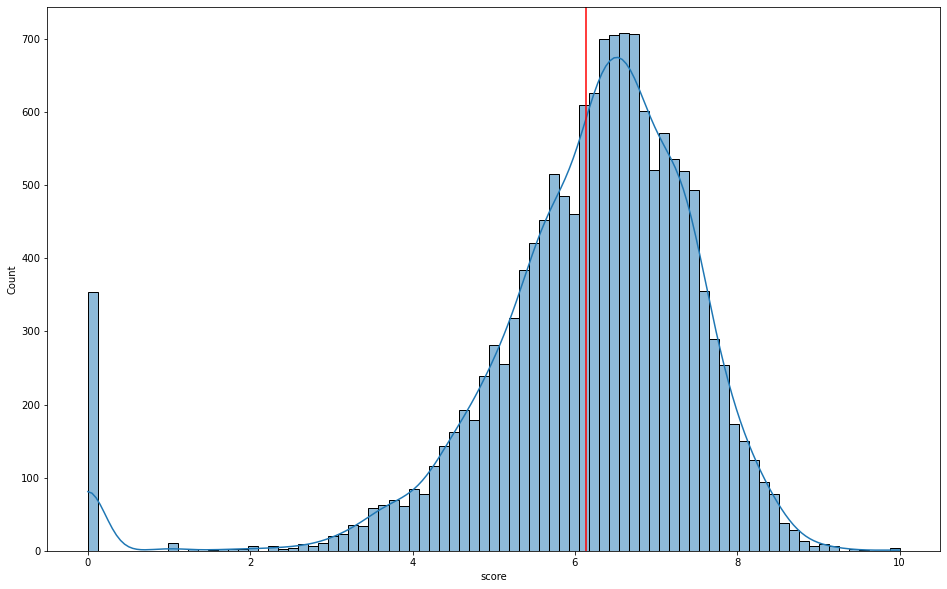

In [99]:
plt.figure(figsize=(16,10))
sns.histplot(anime_dropped.score, kde=True)
plt.axvline(anime_dropped.score.mean(), color="red")

In [100]:
len(anime_dropped[anime_dropped.score == 0])/anime_dropped.shape[0]*100

2.445089100704517

By calculation, animes with 0 score take approximately only 2.4% of the animes, but it should be consider significant in the histogram.

In [101]:
anime_dropped[anime_dropped.score == 0]["status"].value_counts()

Not yet aired       336
Finished Airing      12
Currently Airing      6
Name: status, dtype: int64

Most of 0 scored animes are unaired yet. That can be predicted.

In [102]:
anime_dropped[(anime_dropped.score == 0) & (anime_dropped.status == "Finished Airing")].head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,premiered,related,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
14014,37814,Inazuma Eleven Reloaded: Reformation of Soccer,NaN,イナズマイレブン リローデッド ～サッカーの変革へんかく～,NaN,https://cdn.myanimelist.net/images/anime/1946/...,Special,Game,1,Finished Airing,...,Winter 2018,"{'Alternative version': [{'mal_id': 5231, 'typ...",NaN,NaN,OLM,Sports,NaN,NaN,2018-01-21,2018-01-21
14122,37860,Free!: Take Your Marks: Character Butai Aisatsu,NaN,特別版 Free!-Take Your Marks- キャラクター舞台挨拶,NaN,https://cdn.myanimelist.net/images/anime/1131/...,Movie,Original,4,Finished Airing,...,Fall 2017,"{'Other': [{'mal_id': 35198, 'type': 'anime', ...",NaN,NaN,Kyoto Animation,Comedy,NaN,NaN,2017-10-28,2017-10-28
14133,35103,Tanabata Monogatari,NaN,七夕ものがたり,NaN,https://cdn.myanimelist.net/images/anime/12/84...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,NaN,NaN,"Historical, Kids",NaN,NaN,NaT,NaT


<AxesSubplot:xlabel='rating', ylabel='score'>

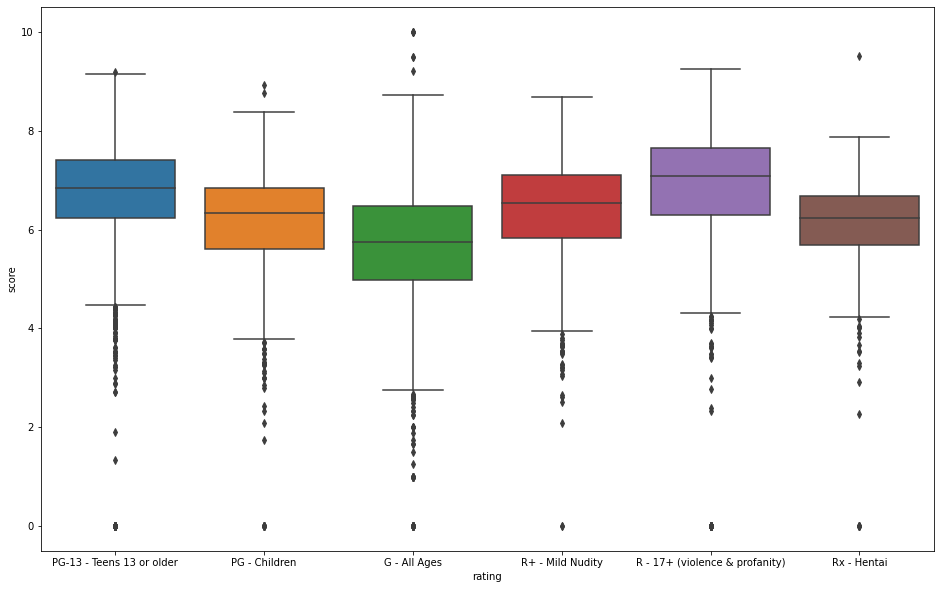

In [103]:
plt.figure(figsize=(16,10))
sns.boxplot(x=anime_dropped.rating, y=anime_dropped.score)

<AxesSubplot:xlabel='scored_by', ylabel='Count'>

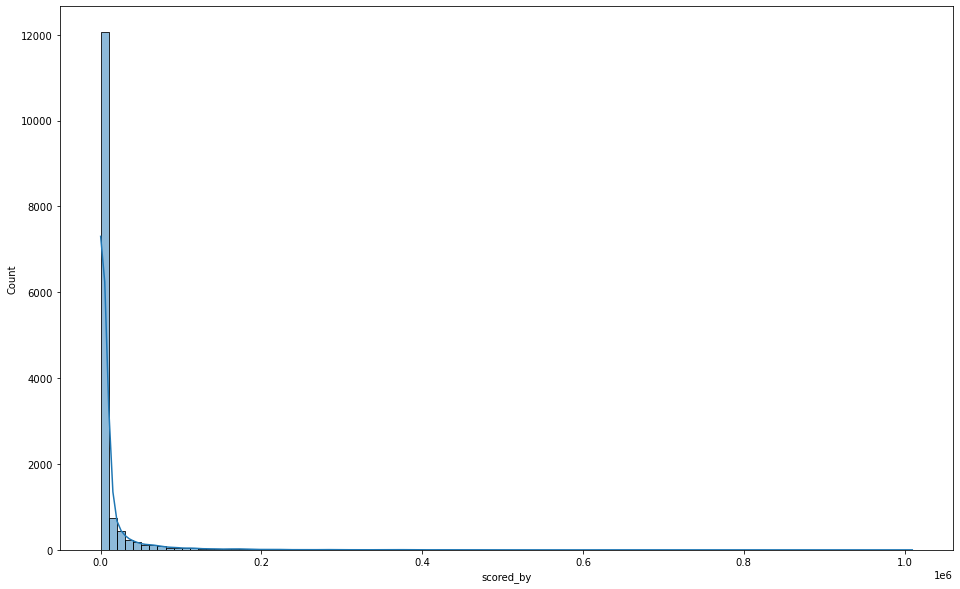

In [104]:
plt.figure(figsize=(16,10))
sns.histplot(anime_dropped.scored_by, bins=100, kde=True)

# _ = plt.ylim(0,1000)

By looking at the statistics and the histogram, the distribution of the attribute is a exponential distribution. 

In [105]:
np.round(anime_dropped.scored_by.describe(),2)

count      14478.00
mean       11460.03
std        43105.19
min            0.00
25%           46.00
50%          501.00
75%         3941.50
max      1009477.00
Name: scored_by, dtype: float64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


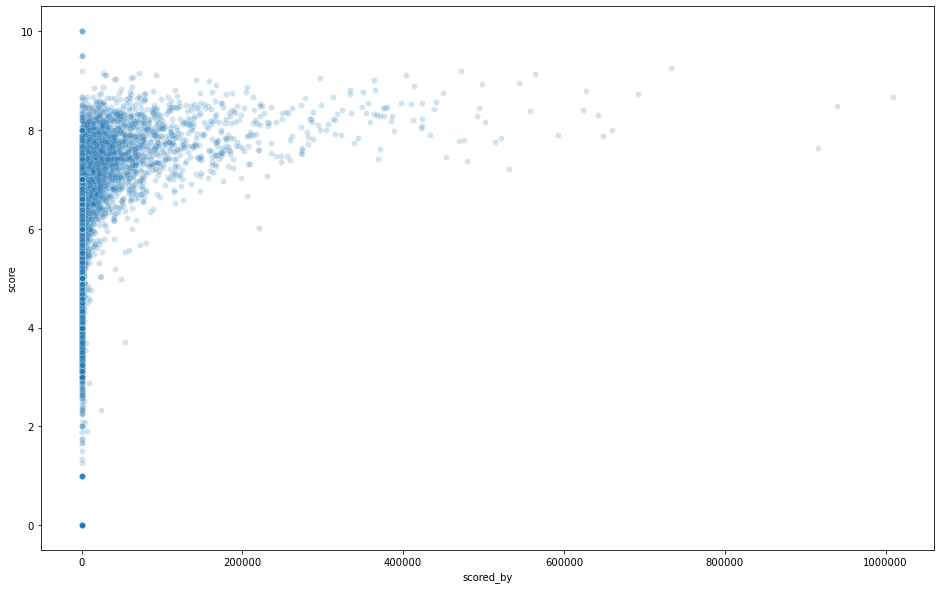

In [106]:
plt.figure(figsize=(16,10))
sns.scatterplot(anime_dropped.scored_by, anime_dropped.score,alpha=0.2)
plt.ticklabel_format(style='plain')

In [107]:
anime_dropped["rank"].describe()

count    12904.000000
mean      6439.065406
std       3720.227608
min          0.000000
25%       3216.250000
50%       6441.500000
75%       9664.000000
max      12919.000000
Name: rank, dtype: float64

In [108]:
anime_dropped[anime_dropped["rank"] == 0].head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,premiered,related,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
8397,20261,W-Tails Cat: A Strange Presence,NaN,W・TAILS CAT - A STRANGE PRESENCE,W Tails Cat: A Strange Presence,https://cdn.myanimelist.net/images/anime/4/539...,ONA,Other,7,Finished Airing,...,Spring 2013,NaN,NaN,NaN,NaN,"Action, Mecha, Military, Hentai, Sci-Fi, Police",NaN,NaN,2013-05-07,2013-10-24
14005,37866,Uchuu Senkan Tiramisù Specials,NaN,宇宙戦艦ティラミス,Space Battleship Tiramisu,https://cdn.myanimelist.net/images/anime/1770/...,Special,Web manga,3,Not yet aired,...,Spring 2018,"{'Adaptation': [{'mal_id': 109403, 'type': 'ma...",NaN,NaN,NaN,"Comedy, Mecha, Sci-Fi, Seinen, Slice of Life, ...",NaN,NaN,2018-06-27,2018-07-25
14067,37869,BanG Dream! 2nd Season,NaN,BanG Dream!（バンドリ！）第2期,NaN,https://cdn.myanimelist.net/images/anime/1861/...,TV,Manga,0,Not yet aired,...,Spring 2018,"{'Adaptation': [{'mal_id': 102005, 'type': 'ma...",NaN,NaN,NaN,Music,NaN,NaN,2018-05-12,NaT


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='rank'>

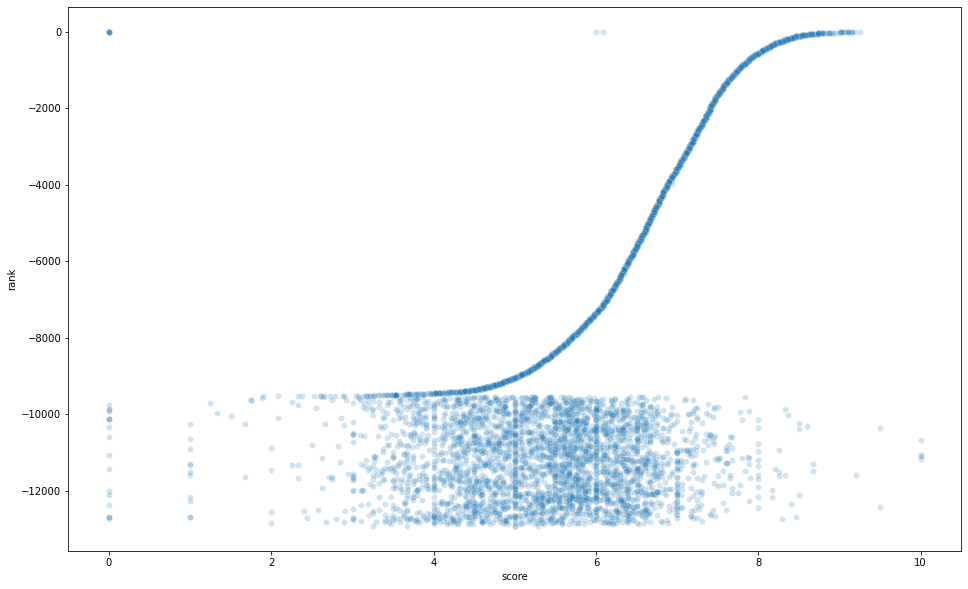

In [109]:
plt.figure(figsize=(16,10))
sns.scatterplot(anime_dropped["score"], -anime_dropped["rank"], alpha=0.2)

What a scatter plot! We can spot a curve on top and a cluster on the bottom. The lower the rank, the higher the score is. Moreover, most of the animes would have the ranking between 10000 and 12000 and the average score would be 5.

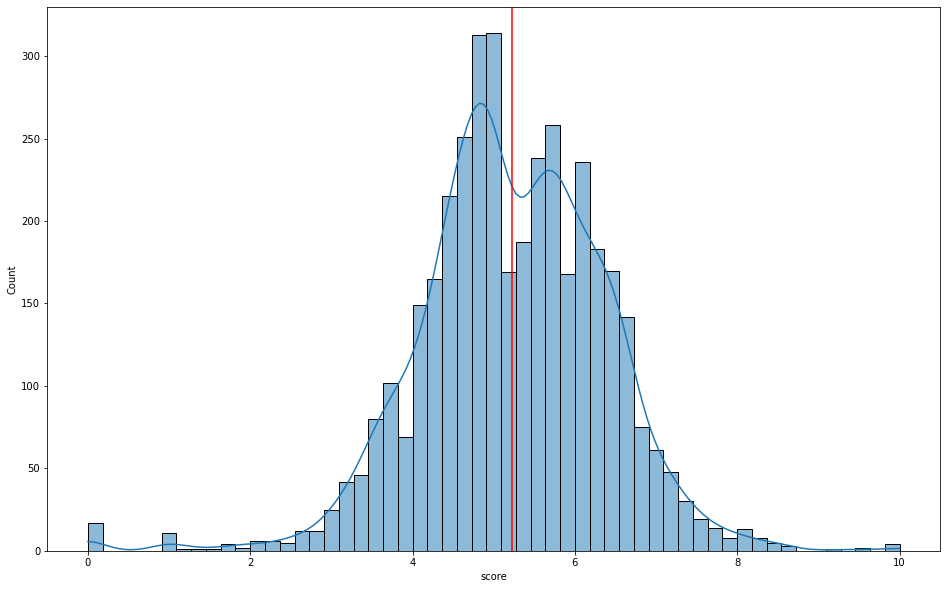

In [110]:
plt.figure(figsize=(16,10))
sns.histplot(anime_dropped[anime_dropped["rank"] > 9000]["score"], kde=True)
plt.axvline(anime_dropped[anime_dropped["rank"] > 9000]["score"].mean(), color="red")

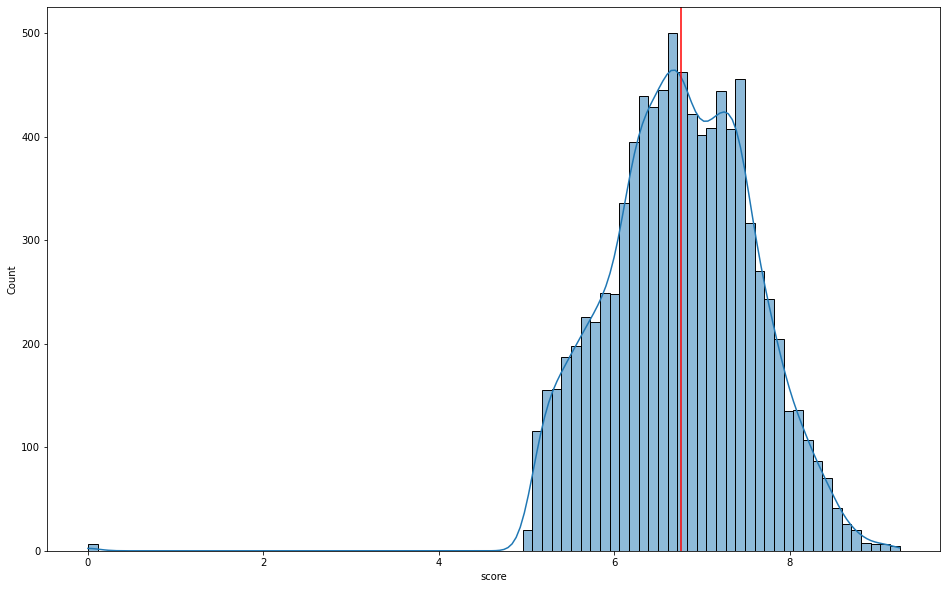

In [111]:
plt.figure(figsize=(16,10))
sns.histplot(anime_dropped[anime_dropped["rank"] < 9000]["score"], kde=True)
plt.axvline(anime_dropped[anime_dropped["rank"] < 9000]["score"].mean(), color="red")

This is where we realize that we can split the animes into 2 types:
- "Popular" anime: Well-known, therefore, have higher ranking.
- "Average" anime: impopular, which means have less audience and lower ranking.

In [112]:
# popularity, members, favorite
np.round(anime_dropped[['popularity', 'members', 'favorites']].describe(),2)

,popularity,members,favorites
count,14478.00,14478.00,14478.00
mean,7220.26,22966.40,311.65
std,4170.08,74981.36,2615.55
min,0.00,0.00,0.00
25%,3611.50,245.00,0.00
50%,7225.50,1679.50,2.00
75%,10827.75,10379.00,23.00
max,14487.00,1456378.00,106895.00


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


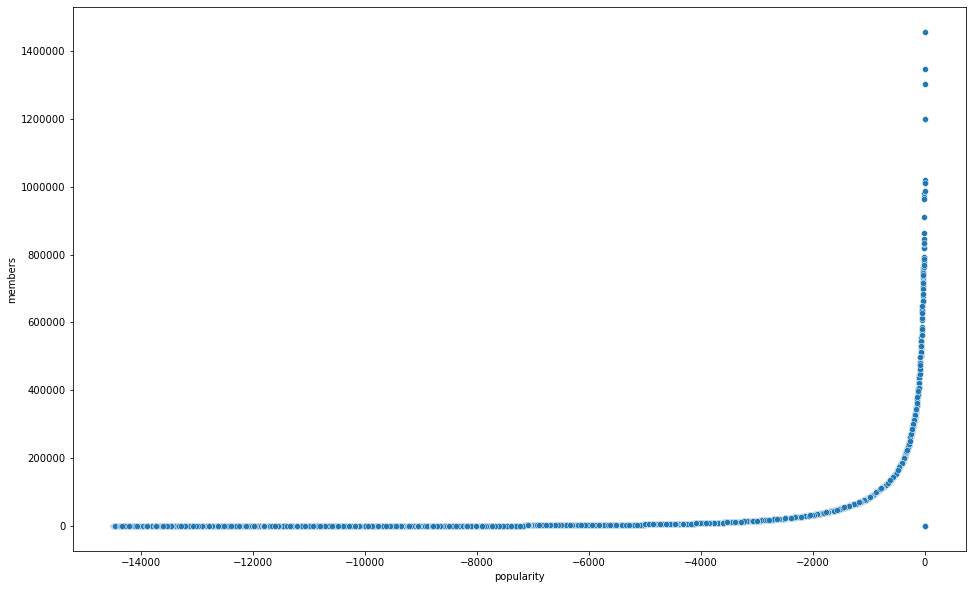

In [113]:
plt.figure(figsize=(16,10))
sns.scatterplot(-anime_dropped.popularity, anime_dropped.members)
plt.ticklabel_format(style='plain')

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


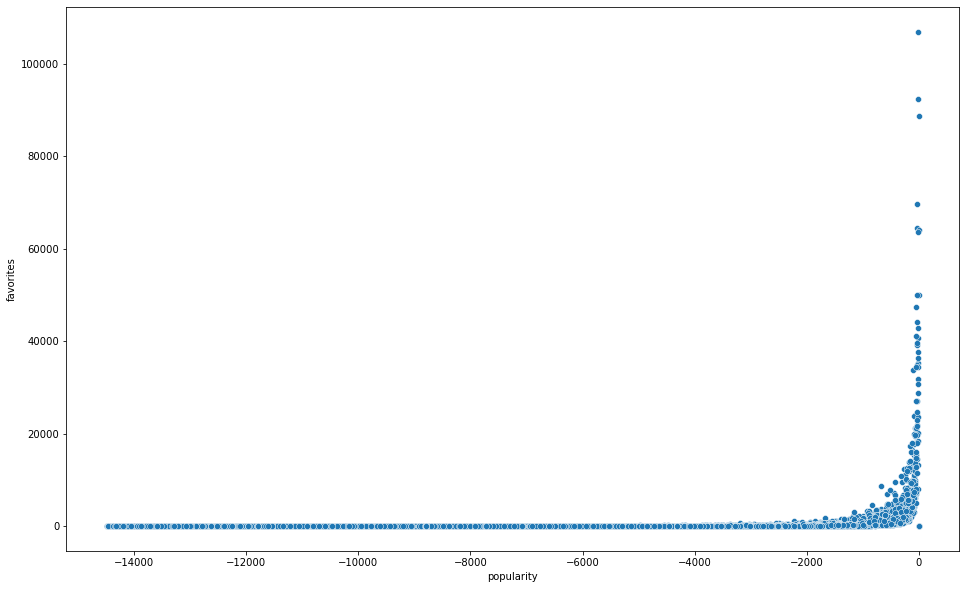

In [114]:
plt.figure(figsize=(16,10))
sns.scatterplot(-anime_dropped.popularity, anime_dropped.favorites)
plt.ticklabel_format(style='plain')

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


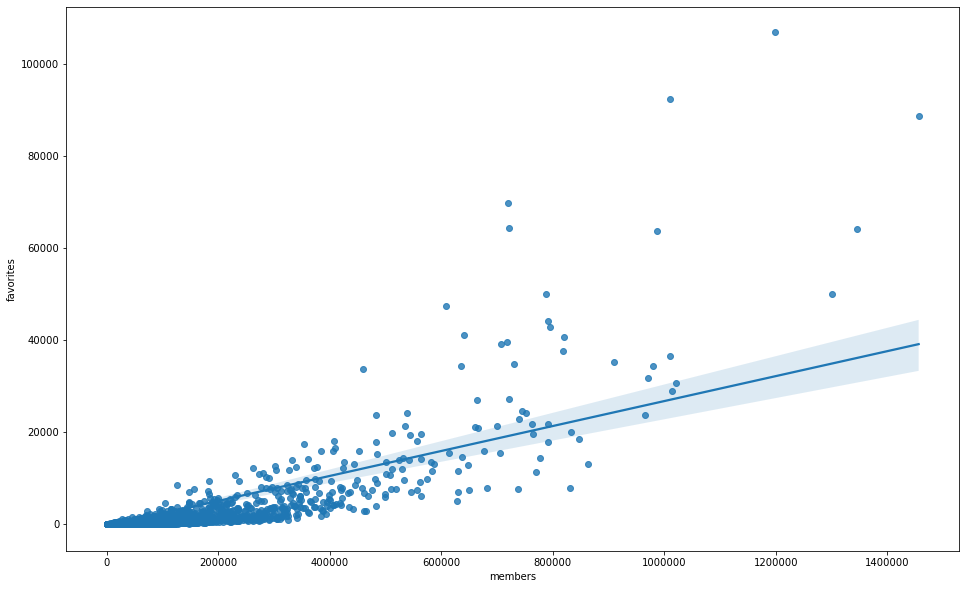

In [115]:
plt.figure(figsize=(16,10))
sns.regplot(anime_dropped.members, anime_dropped.favorites)
plt.ticklabel_format(style='plain')

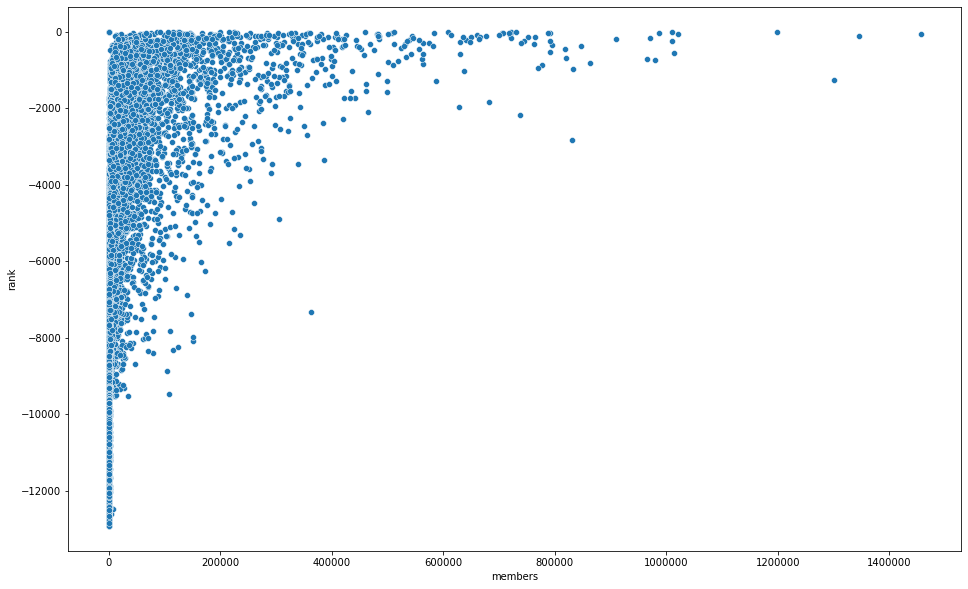

In [116]:
plt.figure(figsize=(16,10))
sns.scatterplot(anime_dropped.members, -anime_dropped["rank"])
plt.ticklabel_format(style='plain')

### Background
This column contains almost null values. Therefore, we would spend some amount of time to decide whether we should drop this column.

In [117]:
anime_dropped[~anime_dropped.background.isnull()][["title", "background"]].head()

,title,background
0,Inu x Boku SS,Inu x Boku SS was licensed by Sentai Filmworks...
3,Princess Tutu,Princess Tutu aired in two parts. The first pa...
12,Sekaiichi Hatsukoi 2,An event to show ep.1 of season 2 (along with ...
14,Bleach,Bleach adapts the first 54 volumes of Tite Kub...
15,Chobits,"The original episodes 9 and 18 are ""recap"" epi..."


In [118]:
print(anime_dropped.loc[0,["background"]])

background    Inu x Boku SS was licensed by Sentai Filmworks...
Name: 0, dtype: object


We can see that the background consists some redundant for the first 2 animes that have values. For `Inu x Boku SS`, the information contains the licensor, which is the same as `licensor` column.

In [119]:
anime_dropped.loc[0,["title","background","licensor"]]

title                                             Inu x Boku SS
background    Inu x Boku SS was licensed by Sentai Filmworks...
licensor                                       Sentai Filmworks
Name: 0, dtype: object

My first thought is, `background` column would represent the origin of the anime. Therefore, it would give the same information as `producer`, `licensor`, `source`, `type` and `related`. Moreover, over 90% values of this column is null. As a result, we could consider dropping this column.

In [120]:
anime_dropped_back = anime_dropped.drop(columns=["background"])

### Related

We transformed `related` from string representation of a dict to `dict` in the previous section.

In [121]:
anime_dropped_back.related.head()

0    {'Adaptation': [{'mal_id': 17207, 'type': 'man...
1    {'Adaptation': [{'mal_id': 759, 'type': 'manga...
2    {'Adaptation': [{'mal_id': 101, 'type': 'manga...
3    {'Adaptation': [{'mal_id': 1581, 'type': 'mang...
4    {'Adaptation': [{'mal_id': 9711, 'type': 'mang...
Name: related, dtype: object

In [122]:
anime_dropped_back.related[0]

{'Adaptation': [{'mal_id': 17207,
   'type': 'manga',
   'url': 'https://myanimelist.net/manga/17207/Inu_x_Boku_SS',
   'title': 'Inu x Boku SS'}],
 'Sequel': [{'mal_id': 13403,
   'type': 'anime',
   'url': 'https://myanimelist.net/anime/13403/Inu_x_Boku_SS_Special',
   'title': 'Inu x Boku SS Special'}]}

It seems that there are different keys on the `related` column. Moreover, since there is a N-N relationship `Related` from the animes, we would like to change `related` column into a new Relationship:
-  `Related(anime_id, related_anime_id, relation_type)`

Additionally, `Inu x Boku SS` has the Adaptation of manga, but in this dataset, we only has anime. Therefore, we must remove any relation with `type` different than `anime`. We can remove the `url` and the `title` from the Relation as this is not needed.

First of all, we would retrieve all the possible relationships.

In [123]:
keys = anime_dropped_back.related.apply(lambda relation: set(relation.keys()) if isinstance(relation,dict) else {})

In [124]:
keys.head()

0                                 {Sequel, Adaptation}
1    {Sequel, Side story, Adaptation, Alternative v...
2                        {Prequel, Sequel, Adaptation}
3                                {Summary, Adaptation}
4                         {Prequel, Other, Adaptation}
Name: related, dtype: object

In [125]:
relation_list = set.union(*keys)

In [126]:
relation_list

{'Adaptation',
 'Alternative setting',
 'Alternative version',
 'Character',
 'Full story',
 'Other',
 'Parent story',
 'Prequel',
 'Sequel',
 'Side story',
 'Spin-off',
 'Summary'}

In [127]:
relation = []
for i in range(anime_dropped_back.shape[0]):
    if isinstance(anime_dropped_back["related"][i], dict):
        for key in anime_dropped_back["related"][i].keys():
            for value in range(len(anime_dropped_back["related"][i][key])):
                if anime_dropped_back["related"][i][key][value]["type"] == "anime":
                    relation.append([anime_dropped_back.anime_id[i], anime_dropped_back["related"][i][key][value]["mal_id"], key])

In [128]:
related = pd.DataFrame(relation, columns=["anime_id", "related_anime_id", "relation_type"])

In [129]:
related.head()

,anime_id,related_anime_id,relation_type
0,11013,13403,Sequel
1,2104,4163,Sequel
2,2104,5199,Side story
3,2104,28385,Alternative version
4,5262,2923,Prequel


In [130]:
related.to_csv("../../data/csv/output/related.csv", index=False)

In [131]:
anime_dropped_related = anime_dropped_back.drop(columns=["related"])

### Creators

In [132]:
anime_dropped_related[["anime_id", 'producer', 'licensor','studio']].head()

,anime_id,producer,licensor,studio
0,11013,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production
1,2104,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo
2,5262,"TV Tokyo, Sotsu",NaN,Satelight
3,721,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker
4,12365,"NHK, Shueisha",NaN,J.C.Staff


There are many producers per anime. Moreover, a producer can produce lots of animes. Therefore, we can create a `Producer` entity, which has the following schema `(producer_id, producer_name)`. Then create a relationship `Produces` which has the schema of `(anime_id, producer_id)`

In [133]:
anime_dropped_related[['producer', 'licensor','studio']].isnull().sum()

producer     6190
licensor    11105
studio       5934
dtype: int64

In [134]:
def create_list(value):
    if isinstance(value, str):
        return set(value.split(", "))
    return {}

In [135]:
producer = anime_dropped_related.producer.apply(create_list)

In [136]:
producer_list = list(set.union(*producer.to_list()))
# producer_list.remove('')
producer_list

['Cookie Jar Entertainment',
 "I'm Enterprise",
 'Toppan Printing',
 'Sanyo Bussan',
 'Crunchyroll SC Anime Fund',
 'Techno Sound',
 'Studio Izena',
 'Jam',
 'Assez Finaud Fabric',
 'Wako Productions',
 'Pazzy Entertainment',
 'Cosmic Ray',
 'Ajia-Do',
 'Agent 21',
 'Diabolik Lovers MB Project',
 'Visual 80',
 'Studio Tron',
 'Usagi Ou',
 'Dream Force',
 'Tokai Television',
 'SBS TV Production',
 'Amber Film Works',
 'Seta Corporation',
 'C &amp; I entertainment',
 'Digital Media Lab',
 'Just Pro',
 'Union Cho',
 'RoiVisual',
 'Emon',
 'Image Kei',
 'Shogakukan Productions',
 'LIDENFILMS',
 'KlockWorx',
 'Group TAC',
 'Fuji Pacific Music Publishing',
 'King Records',
 'Studio Kelmadick',
 'TUBA',
 'Imagin',
 'Enterbrain',
 'Meruhensha',
 'Sumitomo',
 'Jinnis Animation Studios',
 'Studio Anima',
 'Avaco Creative Studios',
 'Chugai Mining Co.',
 'Hisashishi Videos',
 'Kokusai Eigasha',
 'Toho',
 'Lune Pictures',
 'NIANTIC',
 'Azeta Pictures',
 'Sola Digital Arts',
 'DMM.futureworks',
 'N

In [137]:
len(producer_list)

1113

In [138]:
producer_df = pd.DataFrame([[i for i in range(1, len(producer_list) + 1)], producer_list]).T

In [139]:
producer_df.columns = ["producer_id", "producer_name"]

In [140]:
producer_df.to_csv("../../data/csv/output/producers.csv", index=False)

In [141]:
produces = []
for i in range(len(producer)):
    if producer[i] != {}:
        for producer_name in producer[i]:
            produces.append([anime_dropped_related.anime_id[i], producer_df.index[producer_df.producer_name == producer_name].to_list()[0]])

In [143]:
produces_df = pd.DataFrame(produces, columns=["anime_id", "producer_id"])

In [144]:
produces_df.head()

,anime_id,producer_id
0,11013,219
1,11013,91
2,11013,491
3,11013,726
4,11013,885


In [145]:
produces_df.to_csv("../../data/csv/output/produces.csv", index=False)

In [157]:
genre = anime_dropped_related.genre

In [147]:
genre.head()

0      Comedy, Supernatural, Romance, Shounen
1    Comedy, Parody, Romance, School, Shounen
2               Comedy, Magic, School, Shoujo
3      Comedy, Drama, Magic, Romance, Fantasy
4             Comedy, Drama, Romance, Shounen
Name: genre, dtype: object

In [158]:
genre = genre.apply(create_list)

In [160]:
genre_list = list(set.union(*genre.to_list()))
genre_list

['Thriller',
 'Game',
 'Magic',
 'Kids',
 'Music',
 'Super Power',
 'Samurai',
 'Shoujo Ai',
 'Historical',
 'Yuri',
 'Vampire',
 'Yaoi',
 'Romance',
 'Sports',
 'Fantasy',
 'Ecchi',
 'Hentai',
 'Shounen Ai',
 'Harem',
 'Demons',
 'Space',
 'Seinen',
 'Military',
 'Cars',
 'Psychological',
 'School',
 'Slice of Life',
 'Shoujo',
 'Parody',
 'Adventure',
 'Drama',
 'Mecha',
 'Sci-Fi',
 'Josei',
 'Comedy',
 'Shounen',
 'Supernatural',
 'Martial Arts',
 'Action',
 'Dementia',
 'Horror',
 'Mystery',
 'Police']

In [161]:
genre_df = pd.DataFrame({'genre_id':[i + 1 for i in range(len(genre_list))], 'genre_name':genre_list})
genre_df.set_index('genre_id', inplace=True)

In [162]:
genre_df.head()

,genre_name
genre_id,
1,Thriller
2,Game
3,Magic
4,Kids
5,Music


In [163]:
genre_df.to_csv("../../data/csv/output/genre.csv")

In [164]:
[anime_dropped_related.anime_id[0], genre_df.index[genre_df.genre_name == "Music"].to_list()[0]]

[11013, 5]

In [171]:
classifies = []
for i in range(len(genre)):
    if genre[i] != {}:
        for genre_name in genre[i]:
            classifies.append([anime_dropped_related.anime_id[i], genre_df.index[genre_df.genre_name == genre_name].to_list()[0]])

In [172]:
classifies

[[11013, 13],
 [11013, 35],
 [11013, 36],
 [11013, 37],
 [2104, 26],
 [2104, 29],
 [2104, 13],
 [2104, 35],
 [2104, 36],
 [5262, 28],
 [5262, 3],
 [5262, 35],
 [5262, 26],
 [721, 15],
 [721, 3],
 [721, 31],
 [721, 13],
 [721, 35],
 [12365, 13],
 [12365, 35],
 [12365, 36],
 [12365, 31],
 [6586, 28],
 [6586, 4],
 [6586, 26],
 [178, 26],
 [178, 28],
 [178, 3],
 [178, 13],
 [178, 35],
 [2787, 39],
 [2787, 26],
 [2787, 15],
 [2787, 31],
 [2787, 13],
 [2787, 37],
 [4477, 27],
 [4477, 5],
 [4477, 13],
 [4477, 34],
 [4477, 35],
 [853, 26],
 [853, 28],
 [853, 19],
 [853, 13],
 [853, 35],
 [4814, 13],
 [4814, 35],
 [4814, 31],
 [4814, 18],
 [7054, 28],
 [7054, 13],
 [7054, 35],
 [7054, 26],
 [11123, 13],
 [11123, 35],
 [11123, 31],
 [11123, 18],
 [14227, 26],
 [14227, 27],
 [14227, 28],
 [14227, 13],
 [14227, 35],
 [269, 39],
 [269, 6],
 [269, 30],
 [269, 35],
 [269, 36],
 [269, 37],
 [59, 22],
 [59, 16],
 [59, 31],
 [59, 33],
 [59, 13],
 [59, 35],
 [6045, 26],
 [6045, 27],
 [6045, 28],
 [6045, 

In [173]:
classifies_df = pd.DataFrame(classifies, columns=["anime_id", "genre_id"])

In [174]:
classifies_df.head()

,anime_id,genre_id
0,11013,13
1,11013,35
2,11013,36
3,11013,37
4,2104,26


In [175]:
classifies_df.to_csv("../../data/csv/output/classifies.csv", index=False)

In [177]:
anime_dropped = anime_dropped_related.drop(columns=["producer", "genre"])

In [191]:
music = anime_dropped[["opening_theme", "ending_theme"]].fillna('').apply(list)

In [198]:
music.head()

,opening_theme,ending_theme
0,"[""Nirvana"" by MUCC]","[#1: ""Nirvana"" by MUCC (eps 1, 11-12), #2: ""Ra..."
1,"[""Romantic summer"" by SUN&LUNAR]","[#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hin..."
2,"[#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Char...","[#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! (..."
3,"[""Morning Grace"" by Ritsuko Okazaki]","[""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko O..."
4,"[#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIPE...","[#1: ""Pride on Everyday"" by Sphere (eps 1-13),..."


In [194]:
musics = []
for i in range(len(music)):
    for type in ["opening_theme", "ending_theme"]:
        for song in music[type][i]:
            musics.append([anime_dropped.anime_id[i], song, type])

In [196]:
music_df = pd.DataFrame(musics, columns=["anime_id", "song_name", "type"])

In [197]:
music_df.head()

,anime_id,song_name,type
0,11013,"""Nirvana"" by MUCC",opening_theme
1,11013,"#1: ""Nirvana"" by MUCC (eps 1, 11-12)",ending_theme
2,11013,"#2: ""Rakuen no Photograph (楽園のPhotograph)"" by ...",ending_theme
3,11013,"#3: ""Kimi wa (君は)"" by Ririchiyo Shirakiin (Rin...",ending_theme
4,11013,"#4: ""one way"" by Banri Watanuki (Takuya Eguchi...",ending_theme


In [199]:
music_df.to_csv("../../data/csv/output/music.csv", index=False)

In [200]:
anime_final = anime_dropped.drop(columns=["opening_theme", "ending_theme"])

In [203]:
anime_final.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,scored_by,rank,popularity,members,favorites,premiered,licensor,studio,aired_from,aired_to
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://cdn.myanimelist.net/images/anime/12/35...,TV,Manga,12,Finished Airing,...,139250,1274.0,231,283882,2809,Winter 2012,Sentai Filmworks,David Production,2012-01-13,2012-03-30
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://cdn.myanimelist.net/images/anime/13/58...,TV,Manga,26,Finished Airing,...,91206,727.0,366,204003,2579,Spring 2007,Funimation,Gonzo,2007-04-02,2007-10-01
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://cdn.myanimelist.net/images/anime/11/10...,TV,Manga,51,Finished Airing,...,37129,1508.0,1173,70127,802,Fall 2008,NaN,Satelight,2008-10-04,2009-09-25
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://cdn.myanimelist.net/images/anime/13/32...,TV,Original,38,Finished Airing,...,36501,307.0,916,93312,3344,Summer 2002,ADV Films,Hal Film Maker,2002-08-16,2003-05-23
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://cdn.myanimelist.net/images/anime/6/418...,TV,Manga,25,Finished Airing,...,107767,50.0,426,182765,2082,Fall 2012,NaN,J.C.Staff,2012-10-06,2013-03-30


In [204]:
anime_final.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'premiered', 'licensor', 'studio', 'aired_from',
       'aired_to'],
      dtype='object')

In [205]:
anime_final.to_csv("../../data/csv/output/anime.csv", index=False)